In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display

df_results = pd.read_csv('C:/Users/drieb/Downloads/ucla-protest/UCLA-protest/HongKongProtests2019_gallery_001 (1)/hongkong_protest_results.csv')

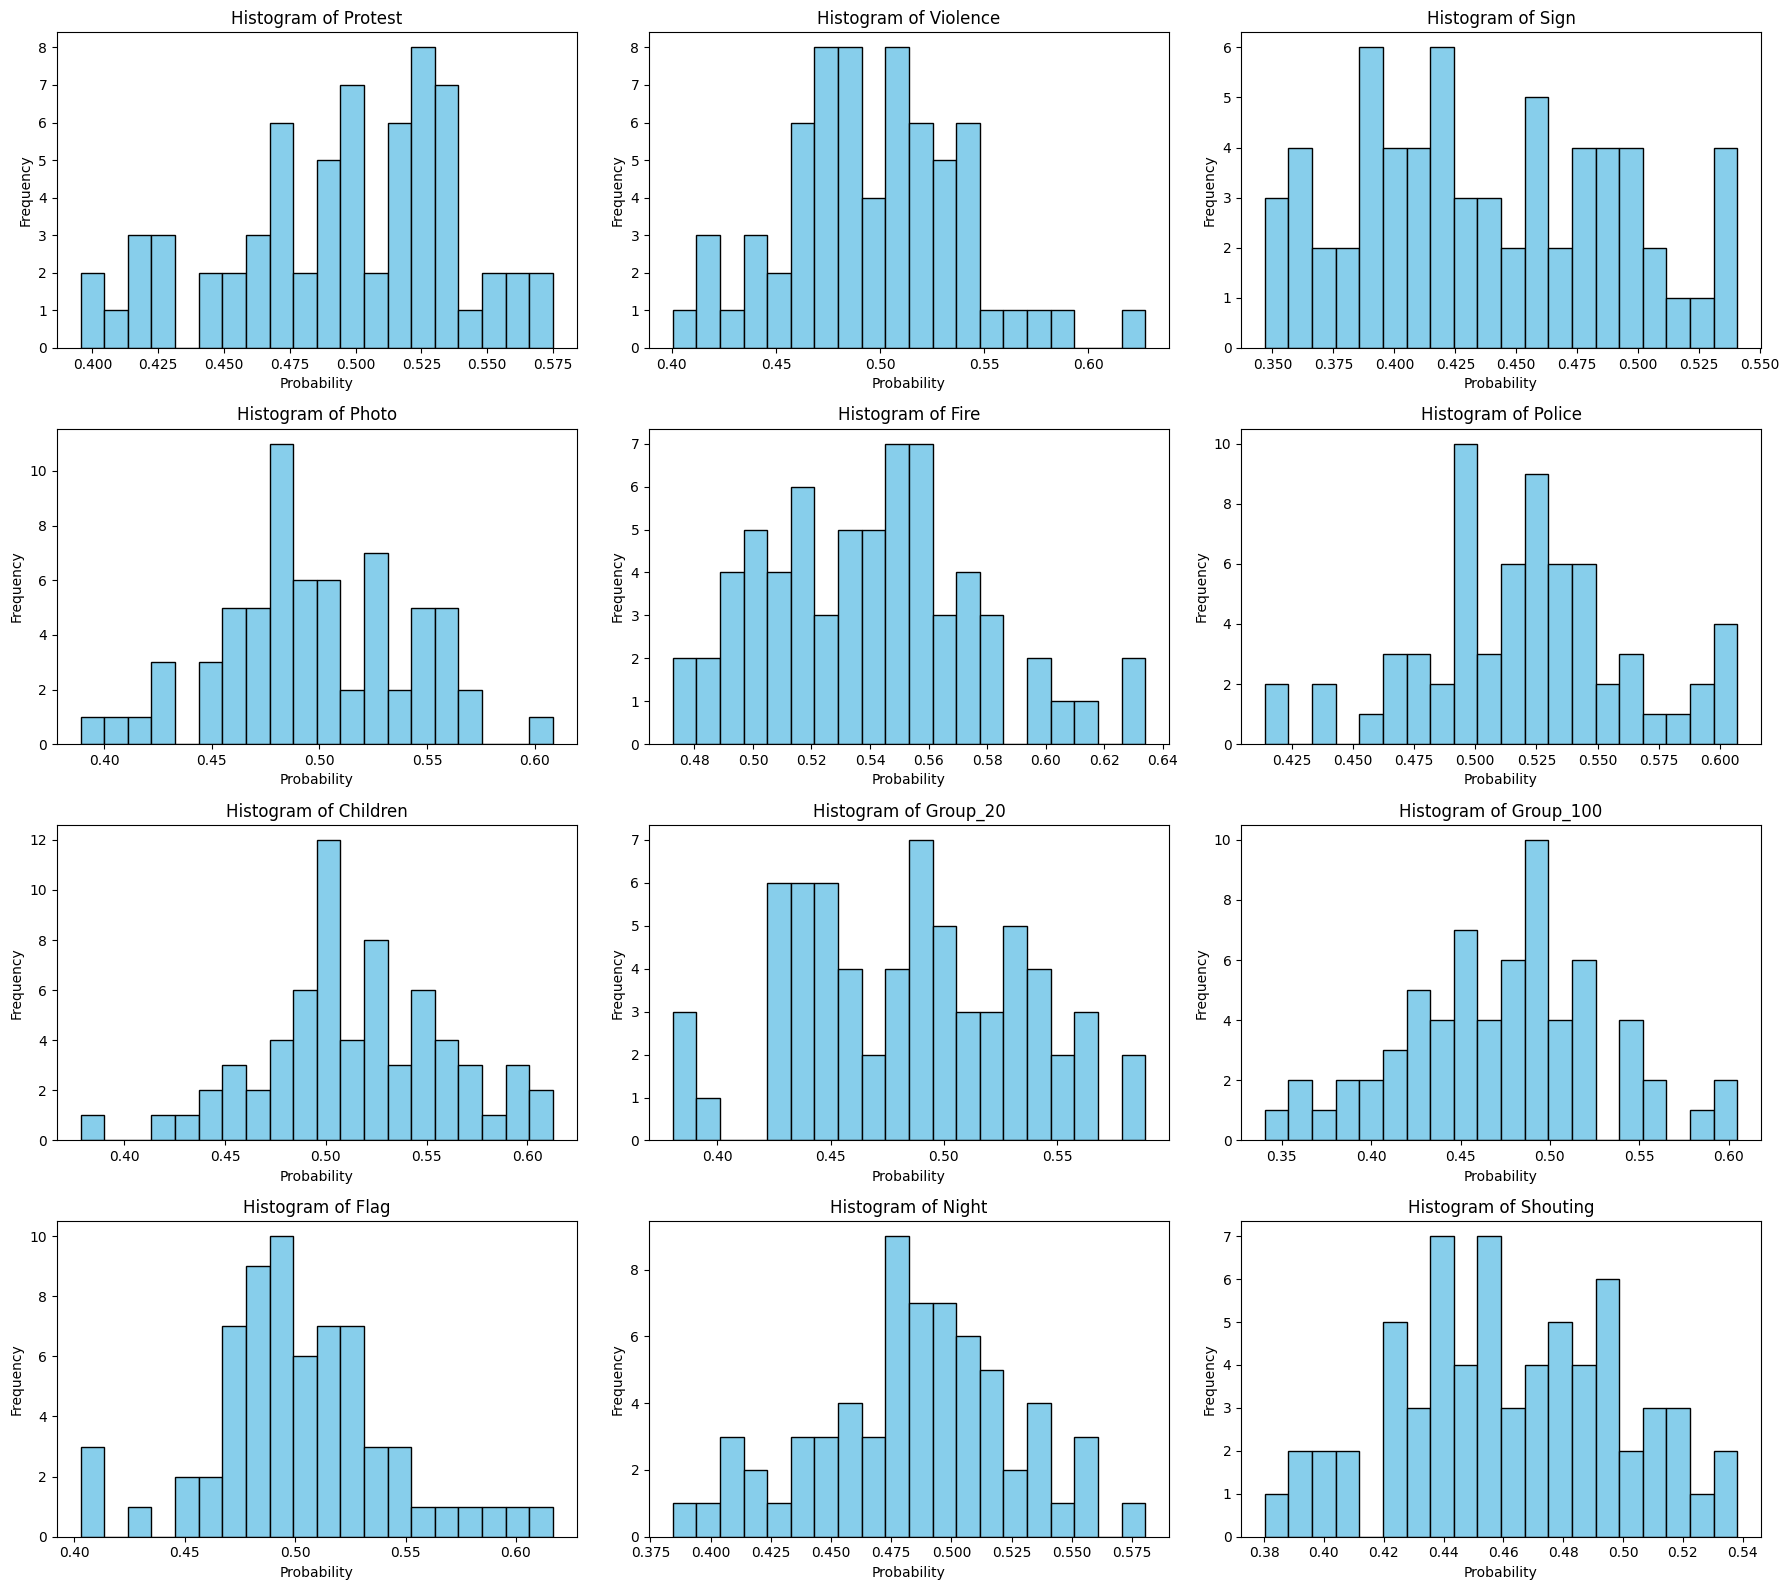

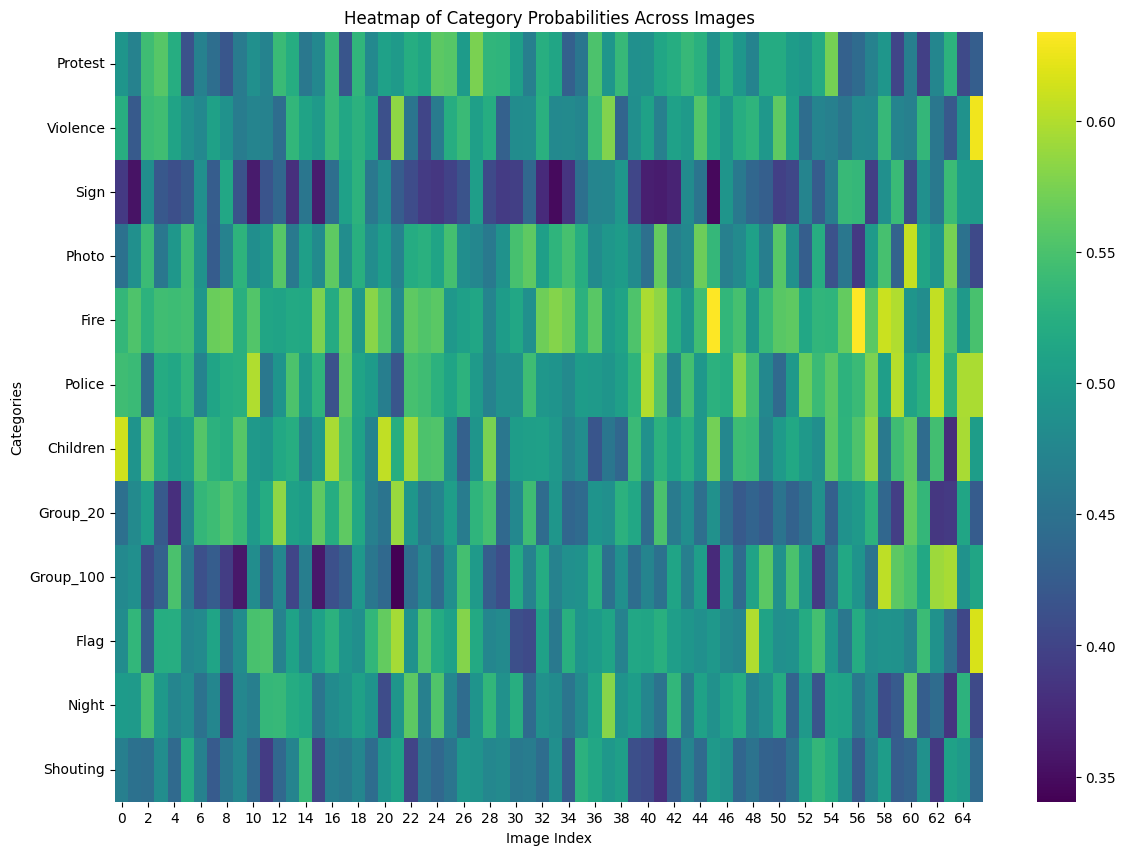

In [6]:
# Histograms and Heatmap
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
categories = df_results.columns[1:]  

for ax, category in zip(axes.flat, categories):
    ax.hist(df_results[category], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {category}')
    ax.set_xlabel('Probability')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(df_results[categories].T, cmap='viridis', annot=False)
plt.title('Heatmap of Category Probabilities Across Images')
plt.xlabel('Image Index')
plt.ylabel('Categories')
plt.show()
 

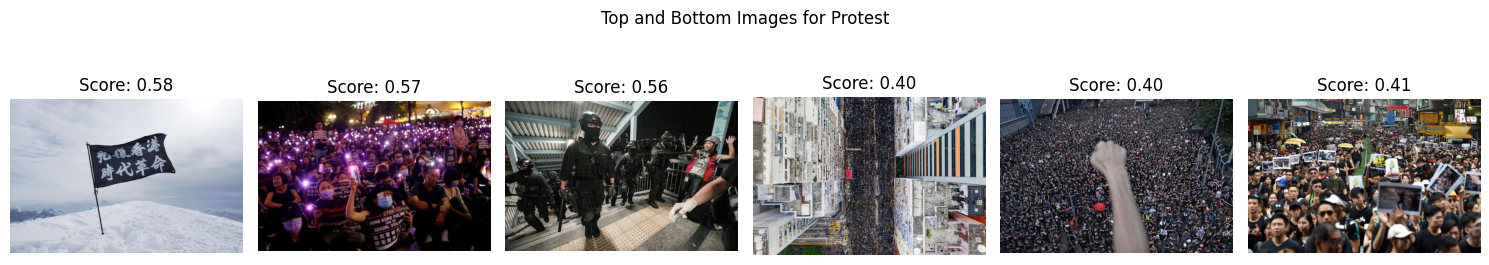

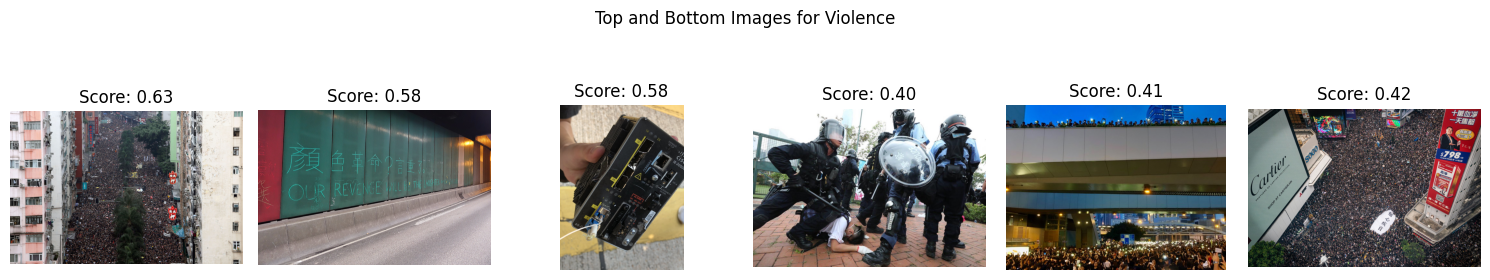

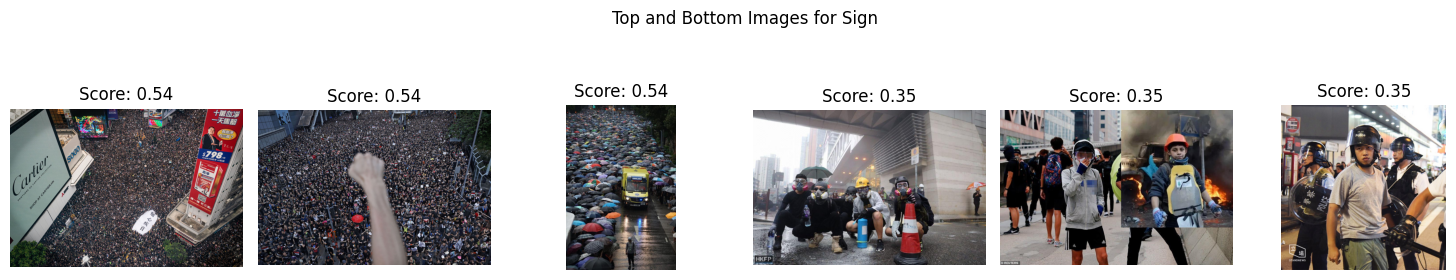

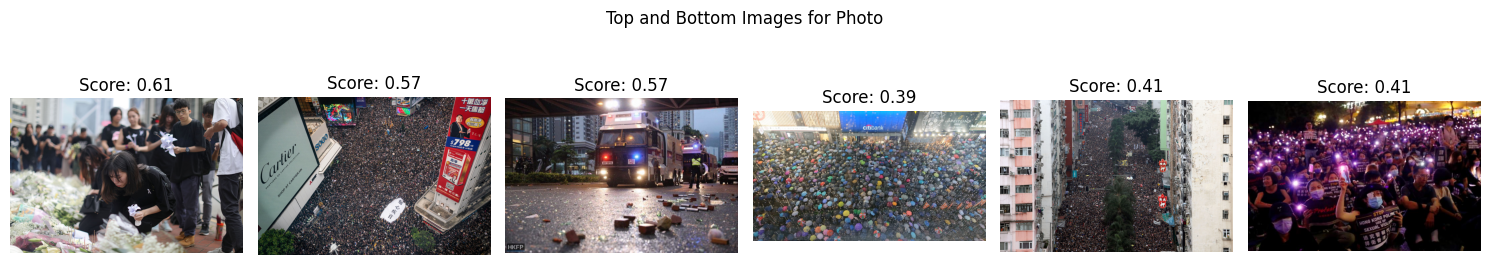

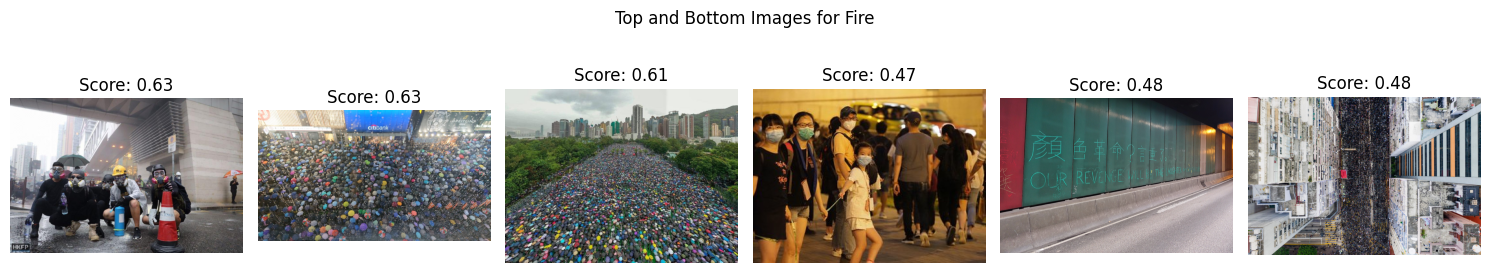

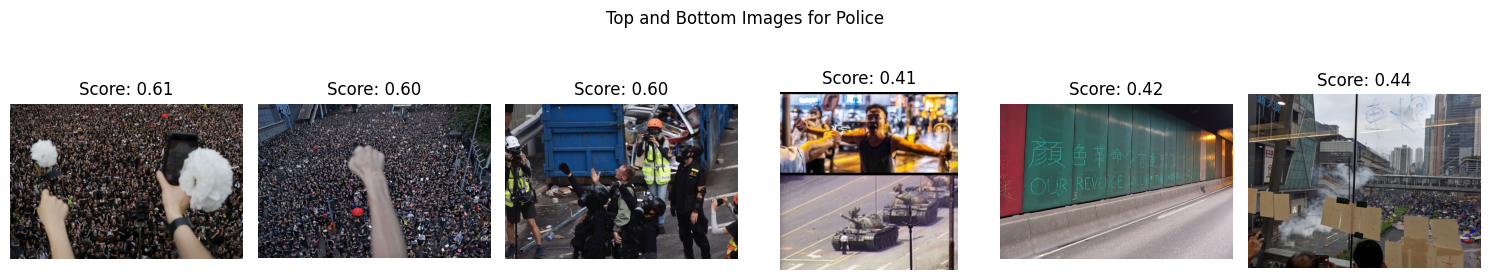

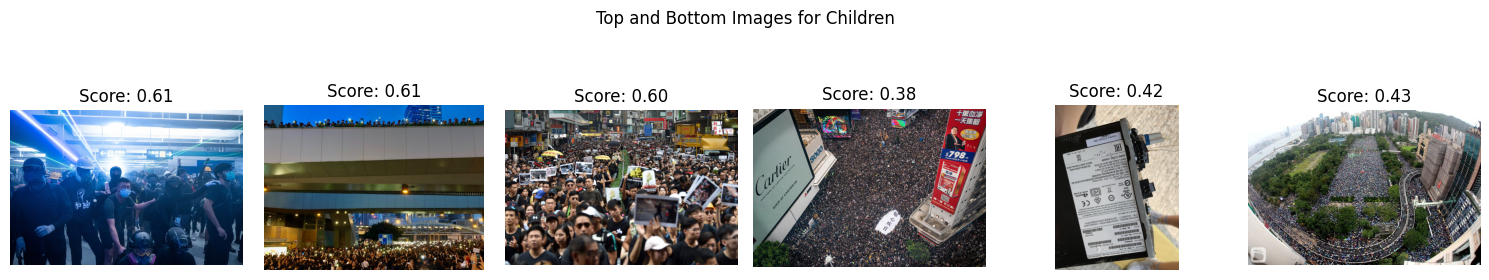

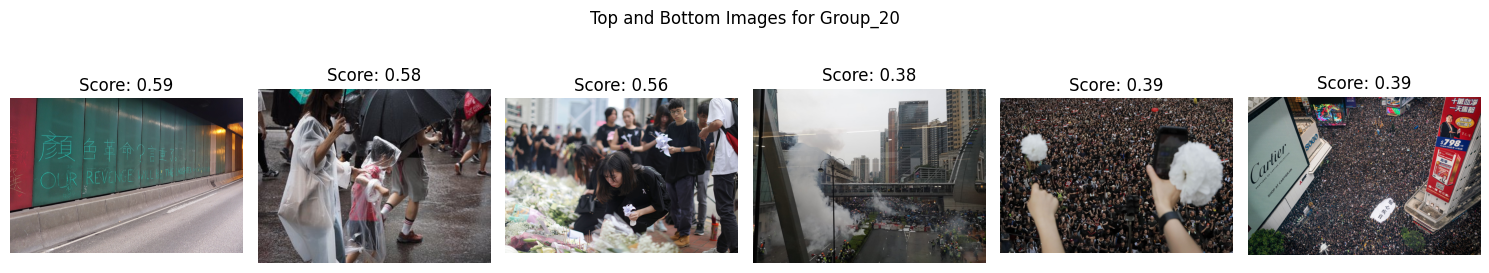

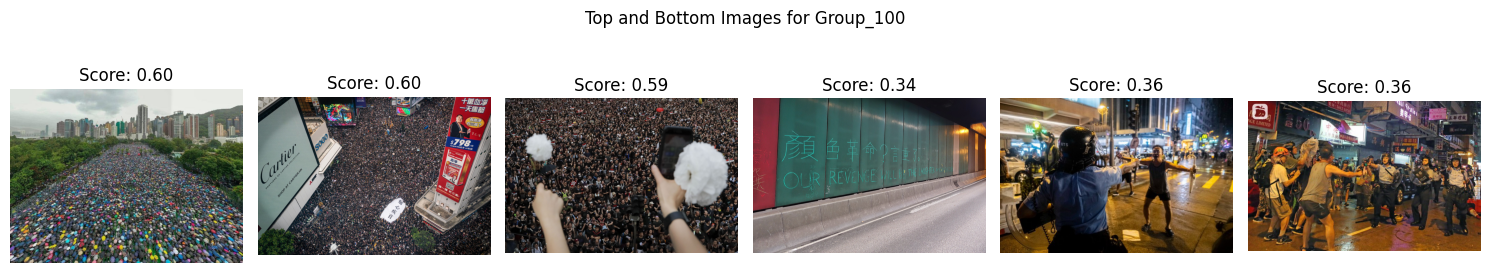

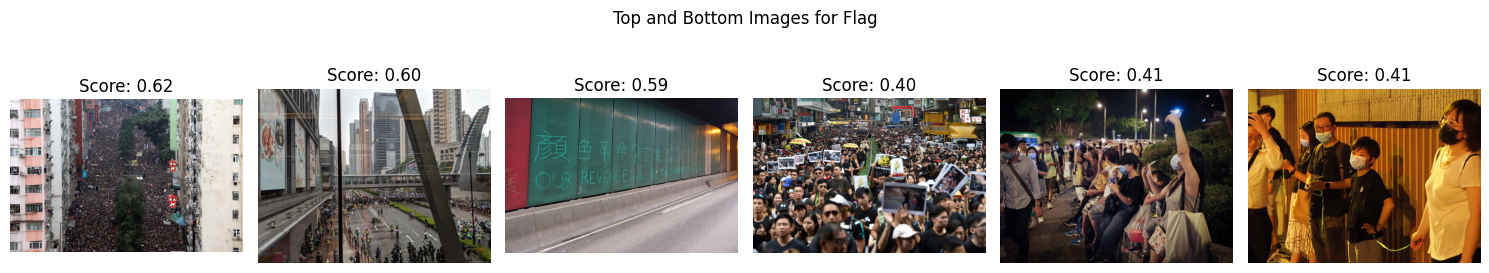

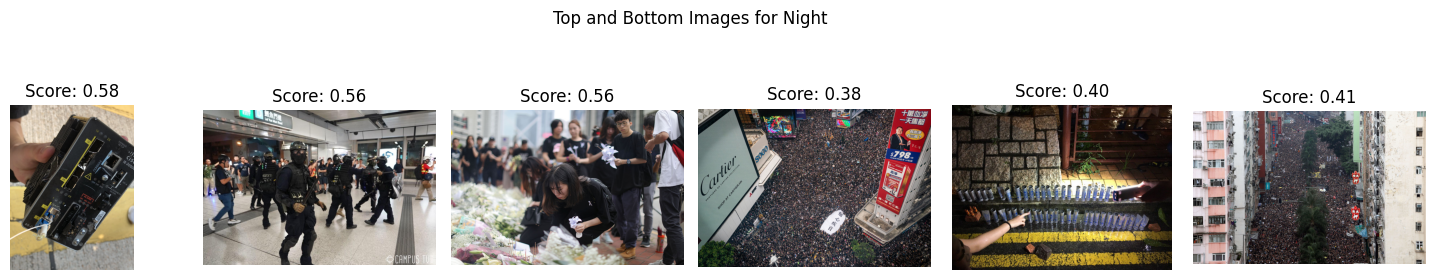

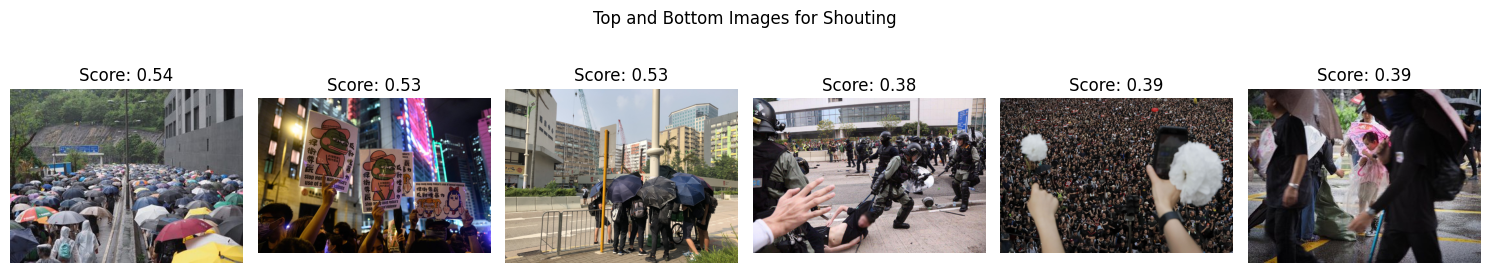

In [13]:

import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd


results_csv_path = 'C:\\Users\\drieb\\Downloads\\ucla-protest\\UCLA-protest\\HongKongProtests2019_gallery_001 (1)\\hongkong_protest_results.csv'
df_results = pd.read_csv(results_csv_path)


img_dir = 'C:\\Users\\drieb\\Downloads\\ucla-protest\\UCLA-protest\\HongKongProtests2019_gallery_001 (1)'


def display_images_with_scores(df, factor, img_dir):
 
    top_images = df.nlargest(3, factor)
   
    bottom_images = df.nsmallest(3, factor)
    

    combined_images = pd.concat([top_images, bottom_images])
    

    fig, axes = plt.subplots(1, 6, figsize=(15, 2.5))
    fig.suptitle(f'Top and Bottom Images for {factor}', y=1.1)
    for ax, (index, row) in zip(axes.flatten(), combined_images.iterrows()):

        img_path = os.path.join(img_dir, row['ImageName'])
        image = Image.open(img_path)
        ax.imshow(image)
        ax.set_title(f"Score: {row[factor]:.2f}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


for factor in df_results.columns[1:]: 
    display_images_with_scores(df_results, factor, img_dir)

 